### Aqui buscamos responder as perguntas de negócio baseado nos dados

- Quais áreas do país mais fizeram pedidos?

- Qual categoria de produtos gerou a maior receita?
                         
- Quais categorias vendem mais?

- O número de vendas aumentou com o tempo?

- Como o Valor médio do pedido (AOV) mudou com o tempo?

- O quão preciso são as datas estimadas de entrega?

In [3]:
import pandas as pd
df = pd.read_parquet('../Dados/processado/df_limpo.parquet')
df.head()

,order_id,product_id,valor_final,categoria,customer_id,customer_state,order_purchase_timestamp,order_estimated_delivery_date,order_delivered_customer_date
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,72.19,cool_stuff,3ce436f183e68e07877b285a838db11a,RJ,2017-09-13 08:59:02,2017-09-29,2017-09-20 23:43:48
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,259.83,pet_shop,f6dd3ec061db4e3987629fe6b26e5cce,SP,2017-04-26 10:53:06,2017-05-15,2017-05-12 16:04:24
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,216.87,moveis_decoracao,6489ae5e4333f3693df5ad4372dab6d3,MG,2018-01-14 14:33:31,2018-02-05,2018-01-22 13:19:16
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,25.78,perfumaria,d4eb9395c8c0431ee92fce09860c5a06,SP,2018-08-08 10:00:35,2018-08-20,2018-08-14 13:32:39
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,218.04,ferramentas_jardim,58dbd0b2d70206bf40e62cd34e84d795,SP,2017-02-04 13:57:51,2017-03-17,2017-03-01 16:42:31


In [16]:
#Quais áreas do país mais fizeram pedidos?

#Separamos a quantidade de pedidos em top3 / outros
estados = df['customer_state'].value_counts()

valores = estados.head(3)
valores['Outros'] = estados.iloc[3:].sum()
valores

customer_state
SP        42165
RJ        12826
MG        11790
Outros    35644
Name: count, dtype: int64

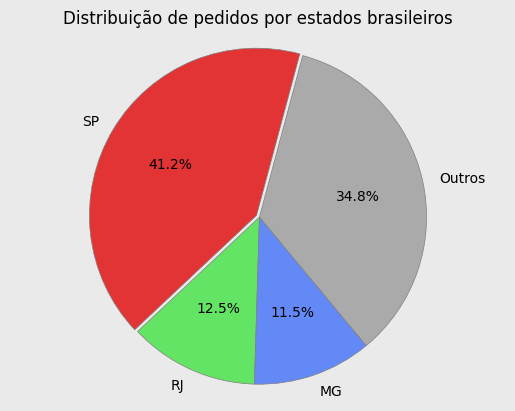

In [52]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.patch.set_facecolor("#eaeaea")
ax.set_facecolor('#eaeaea')
ax.pie(valores,
       labels=valores.index,
       autopct='%1.1f%%',
       startangle=75,
       explode=[0.02,0,0,0],
       colors=["#e23434","#64e464","#6289f5","#aaaaaa"],
       wedgeprops={'edgecolor': 'gray', 'linewidth': 0.5})

ax.axis('equal')
plt.title('Distribuição de pedidos por estados brasileiros')
plt.show()